In [1]:
!wget https://raw.githubusercontent.com/Franck-Dernoncourt/pubmed-rct/refs/heads/master/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt
!wget https://raw.githubusercontent.com/Franck-Dernoncourt/pubmed-rct/refs/heads/master/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt

--2025-06-09 07:12:38--  https://raw.githubusercontent.com/Franck-Dernoncourt/pubmed-rct/refs/heads/master/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28908792 (28M) [text/plain]
Saving to: ‘train.txt.1’

train.txt.1         100%[===================>]  27.57M   121MB/s    in 0.2s    

2025-06-09 07:12:41 (121 MB/s) - ‘train.txt.1’ saved [28908792/28908792]

--2025-06-09 07:12:41--  https://raw.githubusercontent.com/Franck-Dernoncourt/pubmed-rct/refs/heads/master/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)

In [2]:
!wget https://raw.githubusercontent.com/Franck-Dernoncourt/pubmed-rct/refs/heads/master/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt

--2025-06-09 07:12:42--  https://raw.githubusercontent.com/Franck-Dernoncourt/pubmed-rct/refs/heads/master/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4811369 (4.6M) [text/plain]
Saving to: ‘test.txt.1’

test.txt.1          100%[===================>]   4.59M  --.-KB/s    in 0.02s   

2025-06-09 07:12:43 (255 MB/s) - ‘test.txt.1’ saved [4811369/4811369]



Data Dict preparation

Format of interest:{ "line_no":  ,
"target": ,
"text": ,
"total_lines":
}

In [3]:
def process_data(file_path):
  with open(file_path,'r') as f:
    lines = f.readlines()

  data = []

  for line in lines:
    if line.startswith('###'):
      abstract = ''
      line_no=1
    elif line == '\n':
      listabstract = abstract.split('\n')
      total_len = len(listabstract)-1

      for l in listabstract[:-1]:
        internalline = l.split('\t')
        datadict = {"target":internalline[0],"text":internalline[1],"lino_no":line_no,"total_lines":total_len}
        data.append(datadict)
        line_no += 1
    else:
      abstract += line
  return data

test_set = process_data('test.txt')
train_set = process_data('train.txt')
dev_set = process_data('dev.txt')



In [4]:
train_set

[{'target': 'OBJECTIVE',
  'text': 'To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
  'lino_no': 1,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'lino_no': 2,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'lino_no': 3,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'lino_no': 4,
  'total_lines': 12},
 {'target': 'METHODS',
  'text': 'Secondary outcome measures included the Western Ontario and McMaster U

In [5]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plot

TokenVectorization

In [6]:
len(np.array(pd.DataFrame(train_set)['text']))

180040

In [7]:
total_length_string = 0
for i in np.array(pd.DataFrame(train_set)['text']):
  total_length_string = len(i.split()) + total_length_string
avg_length = total_length_string/len(np.array(pd.DataFrame(train_set)['text']))
avg_length

26.338269273494777

In [8]:
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=68000,
                                    standardize='lower_and_strip_punctuation',
                                    output_mode='int',
                                    output_sequence_length = 130,
                                    pad_to_max_tokens = True
                                    )

text_vectorizer.adapt(np.array(pd.DataFrame(train_set)['text']))


In [9]:
text_vectorizer([np.array(pd.DataFrame(train_set)['text'])[0]])

<tf.Tensor: shape=(1, 130), dtype=int64, numpy=
array([[   6,  331,    2,   79,    4,   53,    4,  161, 1127,  217, 2535,
           5,  557,   65, 1584,    3,  670, 5559,  636,    5,    2,  654,
        1137,    3,  180,    2,   70,  495,   36,  781,   15,   53,    5,
         350,  266,    7,  362,    6,  289,  517, 1430, 1743,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0]])>

CharVectorizer

In [10]:
temp_arr = np.array(pd.DataFrame(train_set)['text'])


text = []
for i in temp_arr:
  j = list(i)
  j = ' '.join(j)
  text.append(j)

text


['T o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   O A   )   .',
 'A   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   O A   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'O u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [11]:
text[0]

'T o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   O A   )   .'

In [12]:
def char_dataset_creator(dataset,char_dataset):
  for j,i in enumerate(dataset):
    dict = {}
    dict['target'] = i['target']
    dict['text'] = text[j]
    dict['total_lines'] = i['total_lines']
    dict['lino_no'] = i['lino_no']
    char_dataset.append(dict)
  return char_dataset

char_train_dataset = []
char_val_dataset = []
char_test_dataset = []

char_dataset_train = char_dataset_creator(train_set,char_train_dataset)
char_dataset_val = char_dataset_creator(dev_set,char_val_dataset)
char_dataset_test = char_dataset_creator(test_set,char_test_dataset)



In [13]:
total_length_char = 0
for i in char_dataset_train:
  i = i['text']
  total_length_char = len(i.split()) + total_length_char
avg_length = total_length_char/len(np.array(pd.DataFrame(char_dataset_train)['text']))
avg_length

124.02798822483892

In [14]:
char_vectorizer = TextVectorization(max_tokens=28,standardize='lower_and_strip_punctuation',output_sequence_length=130,pad_to_max_tokens=True)

In [15]:
char_vectorizer.adapt(np.array(pd.DataFrame(char_dataset_train)['text']))

In [16]:
char_vectorizer(['a a a a'])

<tf.Tensor: shape=(1, 130), dtype=int64, numpy=
array([[5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>

Token Embedding layer(Pretrained Glove)

In [17]:
import tensorflow as tf
from tensorflow.keras import layers



# Prepare Glove File
def readGloveFile(gloveFile):
    with open(gloveFile, 'r') as f:
        wordToGlove = {}  # map from a token (word) to a Glove embedding vector
        wordToIndex = {}  # map from a token to an index
        indexToWord = {}  # map from an index to a token

        for line in f:
            record = line.strip().split()
            token = record[0] # take the token (word) from the text line
            wordToGlove[token] = np.array(record[1:], dtype=np.float64) # associate the Glove embedding vector to a that token (word)

        tokens = sorted(wordToGlove.keys())
        for idx, tok in enumerate(tokens):
            kerasIdx = idx + 1  # 0 is reserved for masking in Keras (see above)
            wordToIndex[tok] = kerasIdx # associate an index to a token (word)
            indexToWord[kerasIdx] = tok # associate a word to a token (word). Note: inverse of dictionary above

    return wordToIndex, indexToWord, wordToGlove

# Create Pretrained Keras Embedding Layer
def createPretrainedEmbeddingLayer(wordToGlove, wordToIndex, isTrainable):
    vocabLen = len(wordToIndex) + 1  # adding 1 to account for masking
    embDim = next(iter(wordToGlove.values())).shape[0]  # works with any glove dimensions (e.g. 50)

    embeddingMatrix = np.zeros((vocabLen, embDim))  # initialize with zeros
    for word, index in wordToIndex.items():
        embeddingMatrix[index, :] = wordToGlove[word] # create embedding: word index to Glove word embedding

    embeddingLayer = layers.Embedding(vocabLen, embDim, weights=[embeddingMatrix], trainable=False)
    return embeddingLayer

# usage
wordToIndex, indexToWord, wordToGlove = readGloveFile("/content/glove.6B.50d.txt")
pretrainedEmbeddingLayer = createPretrainedEmbeddingLayer(wordToGlove, wordToIndex, False)

Character Embeddings

In [18]:
char_embedding_layer = layers.Embedding(input_dim = 28,output_dim = 50)

In [19]:
char_embedding_layer(char_vectorizer(char_dataset_train[0]['text']))

<tf.Tensor: shape=(130, 50), dtype=float32, numpy=
array([[-0.01517415, -0.02350017, -0.01076291, ..., -0.00082244,
         0.0077013 , -0.04658563],
       [-0.04550651,  0.01235862, -0.01504809, ..., -0.04812118,
        -0.03369844, -0.04084174],
       [ 0.02860869,  0.04016072, -0.04665175, ..., -0.04828499,
        -0.01315994,  0.01818408],
       ...,
       [-0.04699726,  0.02176828, -0.02161254, ...,  0.02243496,
        -0.0414448 ,  0.02155372],
       [ 0.02537173,  0.03477441, -0.00204078, ...,  0.00410974,
         0.04701196,  0.04287138],
       [-0.03154461, -0.00952953,  0.02549095, ...,  0.00854085,
         0.0024485 , -0.00177912]], dtype=float32)>

Onehot encoding the line_no and total_lines

In [20]:
from sklearn.preprocessing import OneHotEncoder

line_no = np.array(pd.DataFrame(train_set)['lino_no'])
total_lines = np.array(pd.DataFrame(train_set)['total_lines'])

one_hot_line = OneHotEncoder(sparse_output = False)
line_no_encoded = one_hot_line.fit_transform(line_no.reshape(-1,1))

one_hot_total = OneHotEncoder(sparse_output = False)
total_lines_encoded = one_hot_total.fit_transform(total_lines.reshape(-1,1))

In [21]:
len(line_no_encoded[0]),len(total_lines_encoded[0])

(31, 27)

Preparing DataPipeline

In [22]:
token_train_data = np.array(pd.DataFrame(train_set)['text'])
char_train_data = np.array(pd.DataFrame(char_dataset_train)['text'])
line_no_data = line_no_encoded
total_lines_data = total_lines_encoded

targets = np.array(pd.DataFrame(train_set)['target'])

one_hot_targets = OneHotEncoder(sparse_output=False)
targets = one_hot_targets.fit_transform(targets.reshape(-1,1))

train_data_X = tf.data.Dataset.from_tensor_slices((token_train_data,char_train_data,line_no_data,total_lines_data))
train_data_Y = tf.data.Dataset.from_tensor_slices(targets)

train_data = tf.data.Dataset.zip((train_data_X,train_data_Y))


In [23]:
train_data = train_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [24]:
token_train_data = np.array(pd.DataFrame(train_set)['text']).reshape(-1,1)
char_train_data = np.array(pd.DataFrame(char_dataset_train)['text']).reshape(-1,1)


targets = np.array(pd.DataFrame(train_set)['target'])

train_data_X = tf.data.Dataset.from_tensor_slices((token_train_data,char_train_data))
one_hot_targets = OneHotEncoder(sparse_output=False)
targets = one_hot_targets.fit_transform(targets.reshape(-1,1))
train_data_Y = tf.data.Dataset.from_tensor_slices(targets)

train_data_2 = tf.data.Dataset.zip((train_data_X,train_data_Y))


In [25]:
train_data_2 = train_data_2.batch(32).prefetch(tf.data.AUTOTUNE)

In [26]:
line_no_dev = np.array(pd.DataFrame(dev_set)['lino_no'])
total_lines_dev = np.array(pd.DataFrame(dev_set)['total_lines'])


line_no_encoded_dev = one_hot_line.transform(line_no_dev.reshape(-1,1))


total_lines_encoded_dev = one_hot_total.transform(total_lines_dev.reshape(-1,1))

token_val_data = np.array(pd.DataFrame(dev_set)['text'])
char_val_data = np.array(pd.DataFrame(char_dataset_val)['text'])
line_no_data = line_no_encoded_dev
total_lines_data = total_lines_encoded_dev

targets = np.array(pd.DataFrame(dev_set)['target'])
one_hot_targets = OneHotEncoder(sparse_output=False)
targets = one_hot_targets.fit_transform(targets.reshape(-1,1))

val_data_X = tf.data.Dataset.from_tensor_slices((token_val_data,char_val_data,line_no_data,total_lines_data))
val_data_Y = tf.data.Dataset.from_tensor_slices(targets)

val_data = tf.data.Dataset.zip((val_data_X,val_data_Y))


In [27]:
val_data = val_data.batch(32).prefetch(tf.data.AUTOTUNE)

In [28]:





token_val_data = np.array(pd.DataFrame(dev_set)['text']).reshape(-1,1)
char_val_data = np.array(pd.DataFrame(char_dataset_val)['text']).reshape(-1,1)


targets = np.array(pd.DataFrame(dev_set)['target'])

val_data_X = tf.data.Dataset.from_tensor_slices((token_val_data,char_val_data))

targets = one_hot_targets.transform(targets.reshape(-1,1))
val_data_Y = tf.data.Dataset.from_tensor_slices(targets)

val_data_2 = tf.data.Dataset.zip((val_data_X,val_data_Y))


In [29]:
val_data_2 = val_data_2.batch(32).prefetch(tf.data.AUTOTUNE)

In [30]:
val_data_2

<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 1), dtype=tf.string, name=None), TensorSpec(shape=(None, 1), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

Buidling Model

In [31]:
#1.token_embedding_block

input_1 = tf.keras.layers.Input(shape = (1,),name='token_embedding_input',dtype='string')
x = text_vectorizer(input_1)
output_1 = pretrainedEmbeddingLayer(x)

model_1 = tf.keras.Model(inputs= input_1,outputs=output_1)

#2.char_embedding_block

input_2 = tf.keras.layers.Input(shape = (1,),name='char_embedding_input',dtype='string')
x = char_vectorizer(input_2)
x = char_embedding_layer(x)
x = layers.Bidirectional(layers.LSTM(25,activation='tanh',return_sequences=True))(x)
output_2 = tf.keras.layers.Dropout(0.5)(x)
model_2 = tf.keras.Model(inputs=input_2,outputs=output_2)

#3.positional_embedding

input_3 = tf.keras.layers.Input(shape=(31,),name='line_no_input')
output_3 = tf.keras.layers.Dense(10,activation='tanh')(input_3)
model_3 = tf.keras.Model(inputs=input_3,outputs=output_3)

#4.positional_encoding_additional

input_4 = tf.keras.layers.Input(shape=(27,),name='total_lines_input')
output_4 = tf.keras.layers.Dense(10,activation='tanh')(input_4)
model_4 = tf.keras.Model(inputs=input_4,outputs=output_4)

#concatenating all the 4 models outputs

concatenated_output = tf.keras.layers.Concatenate()([model_1.output,model_2.output])
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,activation='tanh'))(concatenated_output)


x = tf.keras.layers.Concatenate()([x,model_3.output,model_4.output])
x = tf.keras.layers.Dense(128,activation='tanh')(x)
output = tf.keras.layers.Dense(5,activation='softmax')(x)

model_01 = tf.keras.Model(inputs=[model_1.input,model_2.input,model_3.input,model_4.input],outputs=output)





In [32]:
#1.token_embedding_block

input_1 = tf.keras.layers.Input(shape = (1,),name='token_embedding_input',dtype='string')
x = text_vectorizer(input_1)
output_1 = pretrainedEmbeddingLayer(x)


model_1 = tf.keras.Model(inputs= input_1,outputs=output_1)

#2.char_embedding_block

input_2 = tf.keras.layers.Input(shape = (1,),name='char_embedding_input',dtype='string')
x = char_vectorizer(input_2)
x = char_embedding_layer(x)
x = layers.Bidirectional(layers.LSTM(25,activation='tanh',return_sequences=True))(x)
output_2 = tf.keras.layers.Dropout(0.5)(x)
model_2 = tf.keras.Model(inputs=input_2,outputs=output_2)





#concatenating all the 4 models outputs

concatenated_output = tf.keras.layers.Concatenate()([model_1.output,model_2.output])
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,activation='tanh'))(concatenated_output)
x = tf.keras.layers.Dense(128,activation='tanh')(x)
output = tf.keras.layers.Dense(5,activation='softmax')(x)

model_11= tf.keras.Model(inputs=[model_1.input,model_2.input],outputs=output)





In [33]:
model_01.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(1e-3),metrics = ['accuracy'])
model_11.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(1e-3),metrics = ['accuracy'])

In [34]:


checkpoint_point_path_11 = 'model_11_checkpoints.weights.h5'
checkpoint_callback_model_11 = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_point_path_11,save_weights_only=True,save_best_only = True,save_freq = 'epoch',verbose=1)

In [35]:
model_01.summary()
model_11.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ char_embedding_inp… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_vectorization… │ (None, 130)       │          0 │ char_embedding_i… │
│ (TextVectorization) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_embedding_in… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 130, 50)   │      1,400 │ text_vectorizati… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_vectorization  │ (None, 130)       │          0 │ token_embedding_… │
│ (TextVectorization) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 130, 50)   │     15,200 │ embedding_1[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 130, 50)   │ 20,000,050 │ text_vectorizati… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 130, 50)   │          0 │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 130, 100)  │          0 │ embedding[0][0],  │
│ (Concatenate)       │                   │            │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ line_no_input       │ (None, 31)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ total_lines_input   │ (None, 27)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 256)       │    234,496 │ concatenate[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 10)        │        320 │ line_no_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 10)        │        280 │ total_lines_inpu… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 276)       │          0 │ bidirectional_1[… │
│ (Concatenate)       │                   │            │ dense[0][0],      │
│                     │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │     35,456 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 5)         │        645 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,287,847 (77.39 MB)

 Trainable params: 287,797 (1.10 MB)

 Non-trainable params: 20,000,050 (76.29 MB)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ char_embedding_inp… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_vectorization… │ (None, 130)       │          0 │ char_embedding_i… │
│ (TextVectorization) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ token_embedding_in… │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 130, 50)   │      1,400 │ text_vectorizati… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_vectorization  │ (None, 130)       │          0 │ token_embedding_… │
│ (TextVectorization) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 130, 50)   │     15,200 │ embedding_1[1][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 130, 50)   │ 20,000,050 │ text_vectorizati… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 130, 50)   │          0 │ bidirectional_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 130, 100)  │          0 │ embedding[1][0],  │
│ (Concatenate)       │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_3     │ (None, 256)       │    234,496 │ concatenate_2[0]… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 128)       │     32,896 │ bidirectional_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 5)         │        645 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,284,687 (77.38 MB)

 Trainable params: 284,637 (1.09 MB)

 Non-trainable params: 20,000,050 (76.29 MB)

In [36]:
model_11.fit(train_data_2,epochs=10,validation_data=val_data_2,steps_per_epoch=int(len(train_data)),validation_steps=int(len(val_data)),callbacks = [checkpoint_callback_model_11])

Epoch 1/10
5626/5627 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6374 - loss: 0.9013
Epoch 1: val_loss improved from inf to 0.72272, saving model to model_11_checkpoints.weights.h5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 146s 25ms/step - accuracy: 0.6375 - loss: 0.9012 - val_accuracy: 0.7176 - val_loss: 0.7227
Epoch 2/10
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7591 - loss: 0.6309
Epoch 2: val_loss improved from 0.72272 to 0.64986, saving model to model_11_checkpoints.weights.h5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 138s 25ms/step - accuracy: 0.7591 - loss: 0.6309 - val_accuracy: 0.7515 - val_loss: 0.6499
Epoch 3/10
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7882 - loss: 0.5604
Epoch 3: val_loss improved from 0.64986 to 0.62558, saving model to model_11_checkpoints.weights.h5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 141s 24ms/step - accuracy: 0.7882 - loss: 0.5604 - val_accuracy: 0.7663 - val_loss: 0.6256
Epoch 4/10
5626/5627 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.80

In [43]:
model_11.save('model_11.h5')

In [38]:
from google.colab import files
files.download("model_11.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:


checkpoint_point_path_01 = 'model_01_checkpoints.weights.h5'
checkpoint_callback_model_01 = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_point_path_01,save_weights_only=True,save_best_only = True,save_freq = 'epoch',verbose=1)

In [40]:
model_01.fit(train_data,epochs=10,validation_data=val_data,steps_per_epoch=int(len(train_data)),validation_steps=int(len(val_data)),callbacks = [checkpoint_callback_model_01])

Epoch 1/10
5625/5627 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7553 - loss: 0.6141
Epoch 1: val_loss improved from inf to 0.44751, saving model to model_01_checkpoints.weights.h5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 154s 27ms/step - accuracy: 0.7553 - loss: 0.6140 - val_accuracy: 0.8281 - val_loss: 0.4475
Epoch 2/10
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8546 - loss: 0.3876
Epoch 2: val_loss improved from 0.44751 to 0.40054, saving model to model_01_checkpoints.weights.h5
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 152s 27ms/step - accuracy: 0.8546 - loss: 0.3876 - val_accuracy: 0.8484 - val_loss: 0.4005
Epoch 3/10
5626/5627 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8721 - loss: 0.3424
Epoch 3: val_loss did not improve from 0.40054
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 262s 38ms/step - accuracy: 0.8721 - loss: 0.3424 - val_accuracy: 0.8473 - val_loss: 0.4064
Epoch 4/10
5627/5627 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8825 - loss: 0.3123
Epoch 4: val_loss improved from 0.4

In [44]:
model_01.save('model_01.h5')

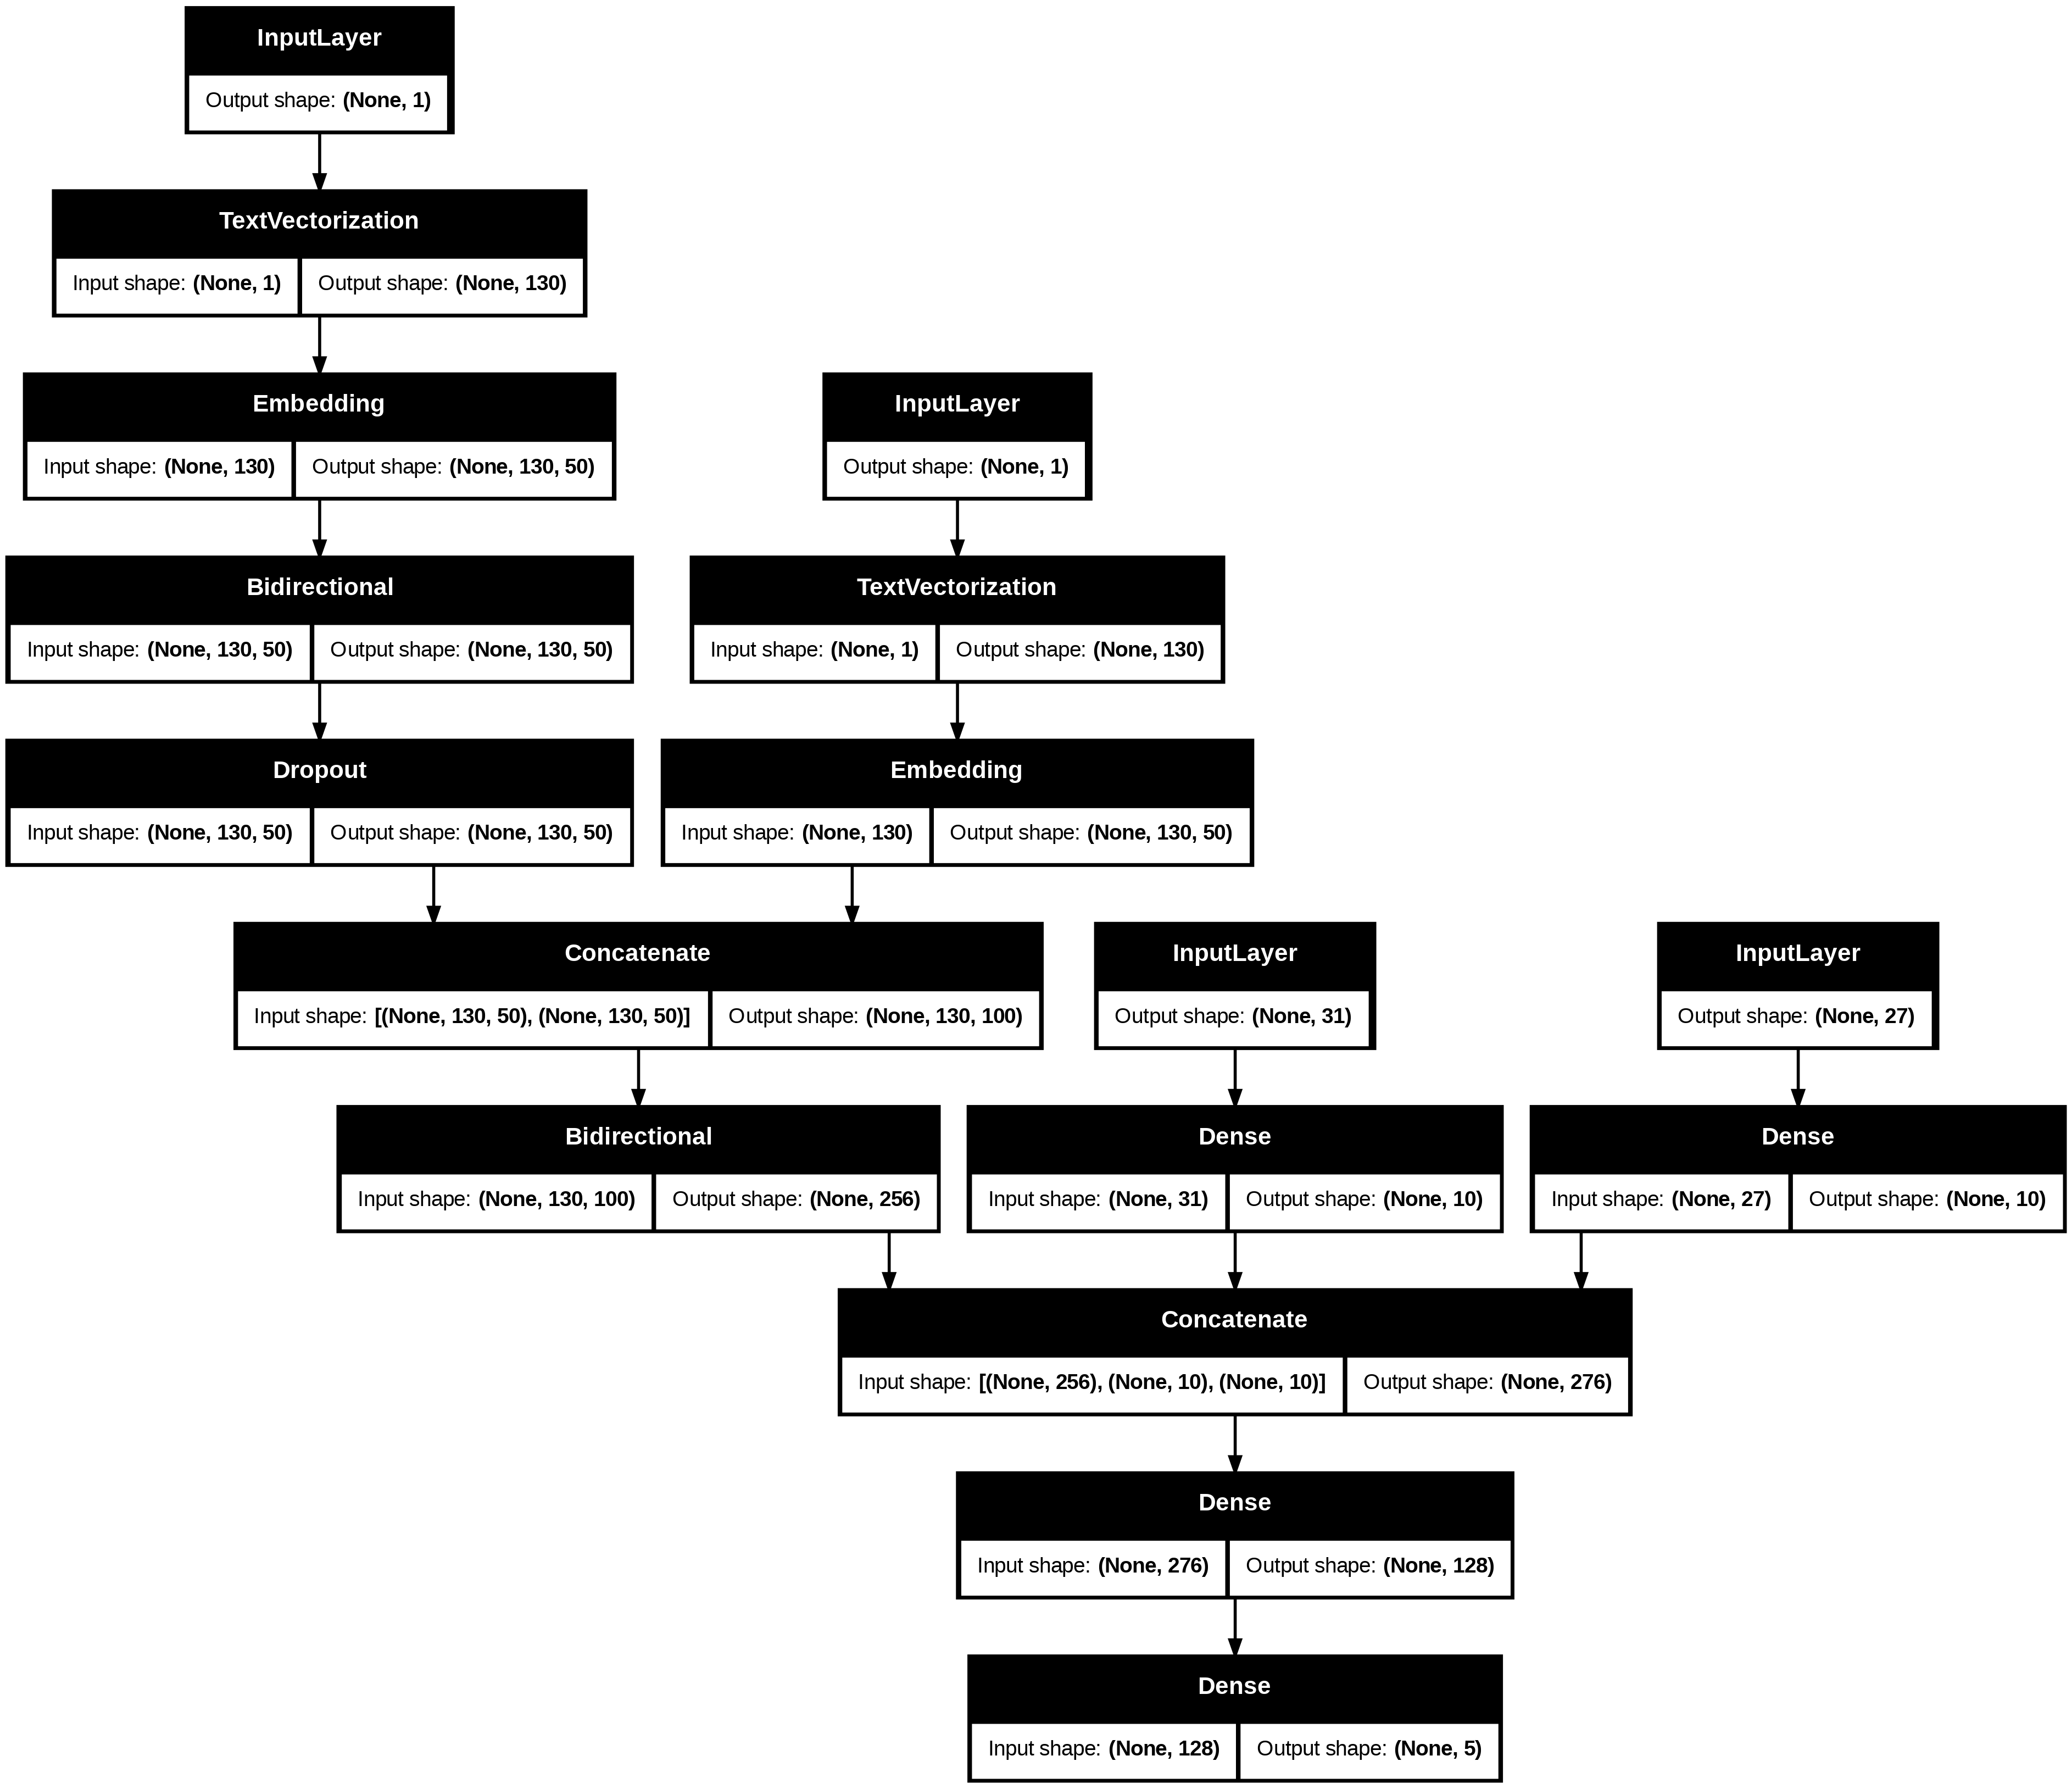

In [46]:
from tensorflow.keras.utils import plot_model
plot_model(model_01,show_shapes=True)


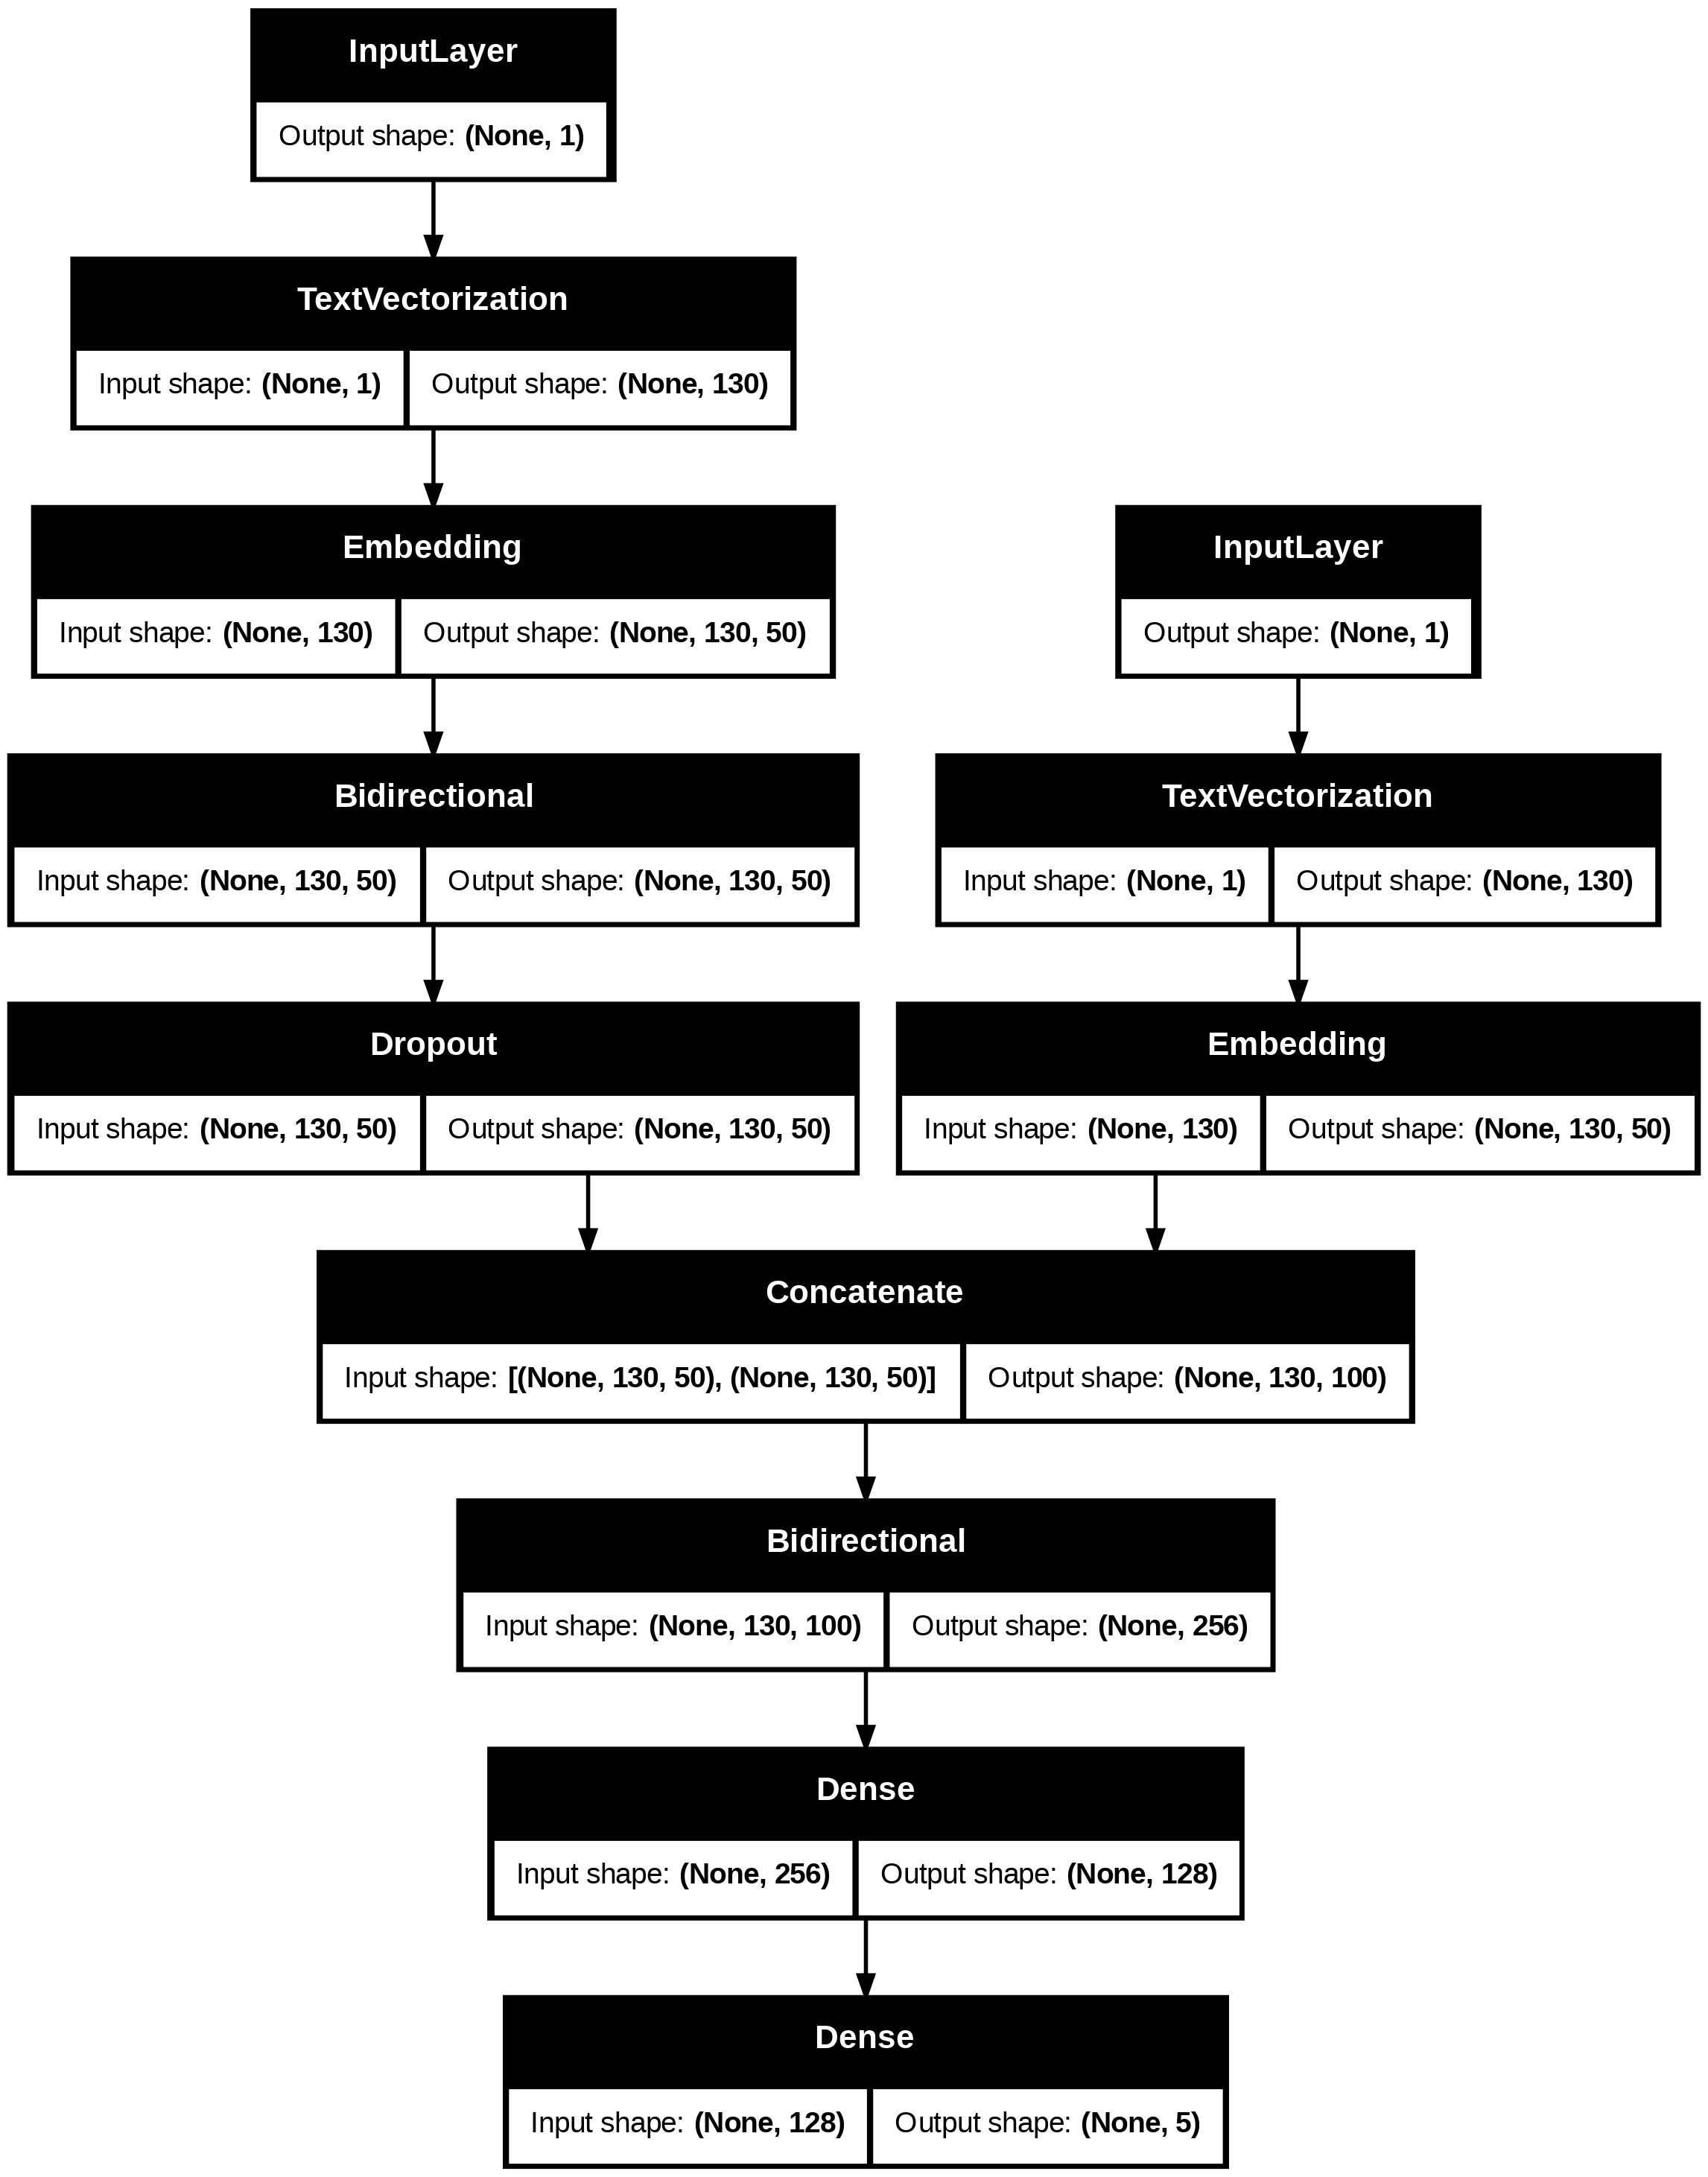

In [47]:
plot_model(model_11,show_shapes=True)

Evaluating models

In [48]:
model_01.load_weights(checkpoint_point_path_01)
model_11.load_weights(checkpoint_point_path_11)

In [54]:
line_no_test = np.array(pd.DataFrame(test_set)['lino_no'])
total_lines_test = np.array(pd.DataFrame(test_set)['total_lines'])


line_no_encoded_test = one_hot_line.transform(line_no_test.reshape(-1,1))


total_lines_encoded_test = one_hot_total.transform(total_lines_test.reshape(-1,1))

token_test_data = np.array(pd.DataFrame(test_set)['text'])
char_test_data = np.array(pd.DataFrame(char_dataset_test)['text'])
line_no_data = line_no_encoded_test
total_lines_data = total_lines_encoded_test

targets = np.array(pd.DataFrame(test_set)['target'])

targets = one_hot_targets.fit_transform(targets.reshape(-1,1))

test_data_X = tf.data.Dataset.from_tensor_slices((token_test_data,char_test_data,line_no_data,total_lines_data))
test_data_Y = tf.data.Dataset.from_tensor_slices(targets)

test_data = tf.data.Dataset.zip((test_data_X,test_data_Y))


test_data = test_data.batch(32).prefetch(tf.data.AUTOTUNE)


In [60]:
# Recreate test_data_2 without reshaping the string arrays to (-1, 1)
token_test_data = np.array(pd.DataFrame(test_set)['text']) # Keep as 1D array
char_test_data = np.array(pd.DataFrame(char_dataset_test)['text']) # Keep as 1D array

targets = np.array(pd.DataFrame(test_set)['target'])

# Ensure one_hot_targets is fitted before transforming test targets
# It was fitted on train_set targets before, which is correct.
# If not fitted, you would fit it here: one_hot_targets.fit(targets.reshape(-1, 1))

targets = one_hot_targets.transform(targets.reshape(-1,1))

test_data_X2 = tf.data.Dataset.from_tensor_slices((token_test_data,char_test_data))
test_data_Y2 = tf.data.Dataset.from_tensor_slices(targets)

test_data_2 = tf.data.Dataset.zip((test_data_X2,test_data_Y2))

test_data_2 = test_data_2.batch(32).prefetch(tf.data.AUTOTUNE)



In [59]:
model_01.evaluate(test_data)

942/942 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8487 - loss: 0.4141


[0.40056273341178894, 0.8527293801307678]

In [62]:
model_11_prob = model_11.predict(test_data_2)
model_01_prob = model_01.predict(test_data)

942/942 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step
942/942 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step


In [63]:
y_pred_01 = tf.argmax(model_01_prob,axis=1)
y_pred_11 = tf.argmax(model_11_prob,axis=1)
y_pred_01
y_pred_11

<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([0, 4, 2, ..., 4, 4, 1])>

In [64]:
y_true = tf.argmax(targets,axis=1)
y_true

<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([0, 4, 4, ..., 4, 4, 1])>

In [67]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(y_true,y_pred):
  fig_size=(18,10)
  text_size=10

  fig,ax = plt.subplots(figsize=fig_size)

  cm  =  confusion_matrix(y_true,y_pred)
  cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_title('confusion_matrix')

  ax.xaxis.set_label_position('bottom')
  ax.yaxis.set_label_position('left')

  threshold = (cm.max() + cm.min())/2

  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(i,j,f"{cm[i,j]:.2f}",horizontalalignment="center",color="white" if cm[i,j]>threshold else "black",size=text_size)


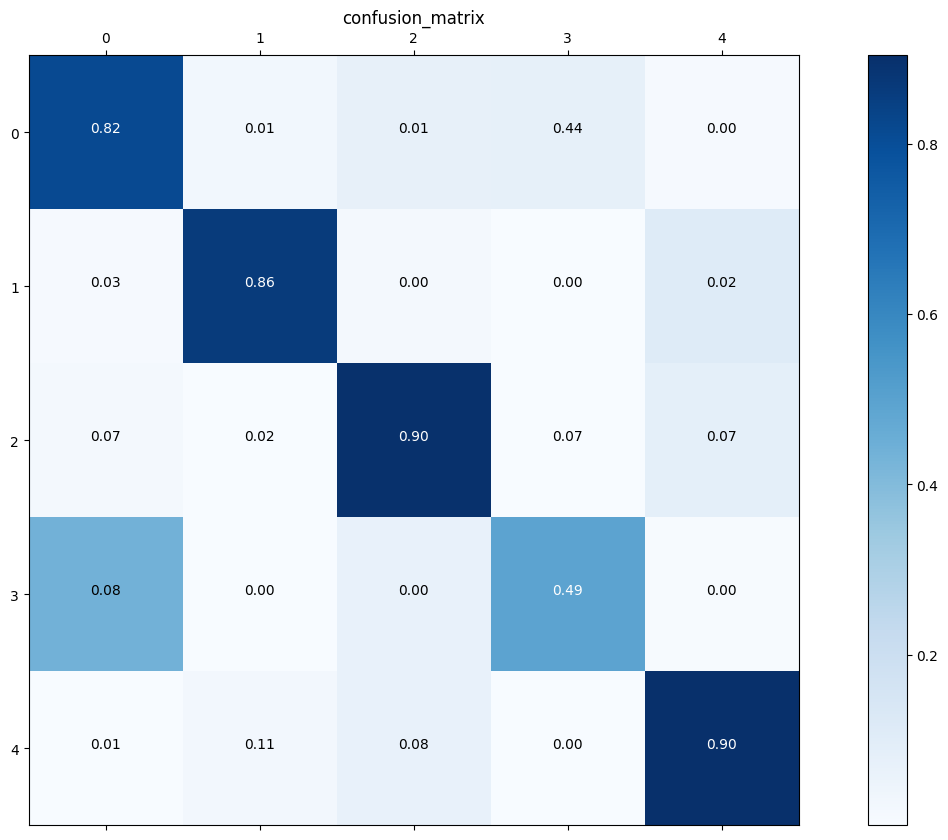

In [68]:
plot_confusion_matrix(y_true,y_pred_01)

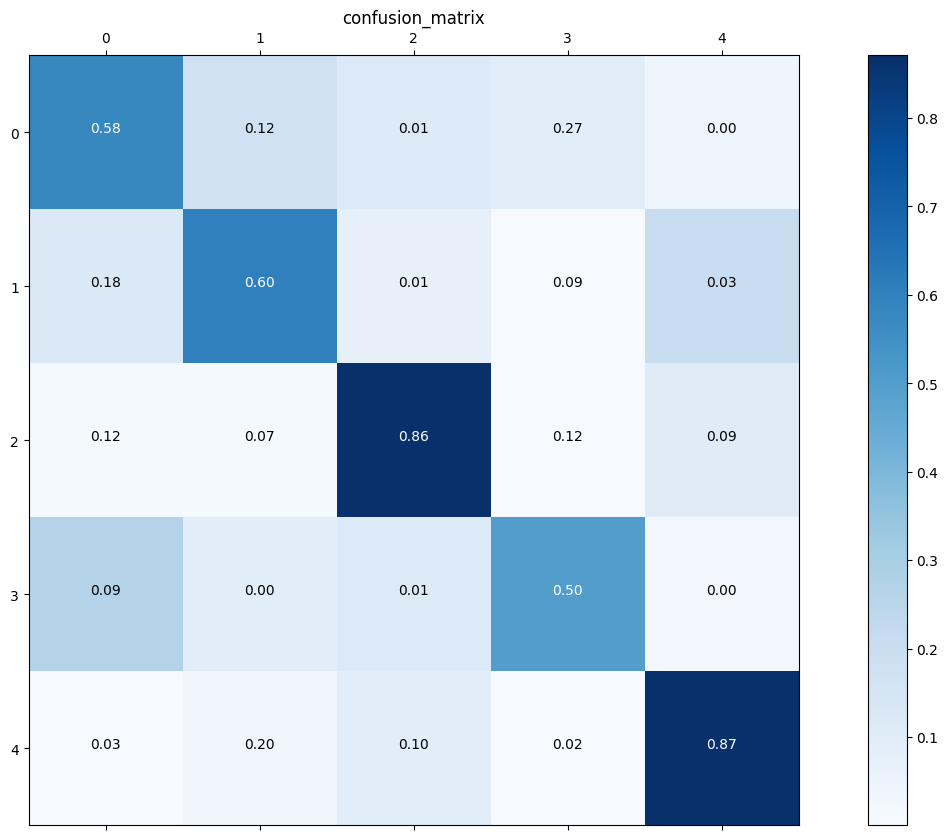

In [69]:
plot_confusion_matrix(y_true,y_pred_11)

In [70]:
from sklearn.metrics import precision_recall_fscore_support
model_01_precision,model_01_recall,model_01_f1,_ = precision_recall_fscore_support(y_true,y_pred_01,average='weighted')
model_11_precision,model_11_recall,model_11_f1,_ = precision_recall_fscore_support(y_true,y_pred_11,average='weighted')

In [72]:
model_01_f1


0.8498224545417646

In [73]:
model_11_f1

0.7581259632727639

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred_01))
print(classification_report(y_true,y_pred_11))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      3621
           1       0.91      0.86      0.89      4571
           2       0.88      0.90      0.89      9897
           3       0.79      0.49      0.61      2333
           4       0.87      0.90      0.88      9713

    accuracy                           0.85     30135
   macro avg       0.83      0.79      0.80     30135
weighted avg       0.85      0.85      0.85     30135

              precision    recall  f1-score   support

           0       0.61      0.58      0.59      3621
           1       0.68      0.60      0.64      4571
           2       0.82      0.86      0.84      9897
           3       0.74      0.50      0.59      2333
           4       0.80      0.87      0.83      9713

    accuracy                           0.76     30135
   macro avg       0.73      0.68      0.70     30135
weighted avg       0.76      0.76      0.76     30135

